<a href="https://colab.research.google.com/github/harshvgangawane/PWSA4/blob/main/Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=500,n_classes=2,random_state=1,n_features=15)

In [3]:
X

array([[-0.96092037,  0.14922738, -0.00319257, ..., -1.26234688,
        -0.22756029,  0.77892583],
       [-0.23011406,  0.67930114, -1.94392176, ..., -0.52137639,
         1.42754695,  0.03619746],
       [ 0.46168244, -0.90204985, -0.32454881, ..., -0.47683878,
         0.81412839,  0.21534143],
       ...,
       [-0.6026206 , -0.61655811,  0.01011814, ...,  0.33787784,
         0.64179452, -1.15841604],
       [ 0.01444842, -0.2407005 , -0.25485295, ...,  0.2590319 ,
        -0.85567139, -2.04820046],
       [-0.23232977, -1.45051648, -0.78546566, ..., -0.52051481,
        -0.31930132, -0.68721124]])

In [4]:
y

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
lr=LogisticRegression()
svc=SVC()
classifier=DecisionTreeClassifier()
gnb=GaussianNB()

In [8]:
from sklearn.ensemble import VotingClassifier

In [9]:
VotingClassifier=VotingClassifier(estimators=[ ('lr',lr),('svc',svc),('classifier',classifier),('gaussian_nb',gnb)],voting='hard')

In [10]:
VotingClassifier

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', SVC()),
                             ('classifier', DecisionTreeClassifier()),
                             ('gaussian_nb', GaussianNB())])

In [11]:
VotingClassifier.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', SVC()),
                             ('classifier', DecisionTreeClassifier()),
                             ('gaussian_nb', GaussianNB())])

In [12]:
y_pred=VotingClassifier.predict(X_test)

In [13]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

In [15]:
acc

0.95

2.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [16]:
from sklearn.datasets import make_regression
X1,y1=make_regression(n_samples=500,n_features=15,noise=0.1,random_state=1)

In [17]:
X1

array([[ 0.38773466, -0.23011406, -0.52137639, ..., -0.35718753,
        -0.63440471, -0.52510339],
       [ 0.56001343, -0.50279436,  0.02137378, ..., -1.51556739,
        -1.51715126,  2.81908709],
       [-0.38593147, -0.25732537, -0.54352052, ...,  0.91279661,
        -1.24634541, -2.3575232 ],
       ...,
       [-1.81301771, -0.48881458, -1.83296934, ...,  1.20280345,
         1.44545669, -1.24356201],
       [-0.79153377, -0.15847242,  0.19574592, ..., -0.75683724,
        -0.62253745,  0.18116909],
       [-0.21892143,  0.65601518,  0.75226986, ...,  2.42497747,
         0.26080007, -0.77660361]])

In [18]:
y1

array([ 1.48849653e+02,  1.21870864e+02, -2.08419954e+02, -2.27200009e+01,
       -1.91783168e+02,  6.30661415e+01,  1.56098449e+02, -8.15325146e+01,
        9.18379999e+01,  4.12608891e+00,  3.80928916e+00, -3.23446576e+01,
        2.20897995e+02, -1.60463659e+02, -8.55434091e+01, -4.51131073e+00,
       -2.48980274e+02, -1.49019507e+02, -3.07405441e+02,  2.78757882e+01,
        2.84555942e+02,  3.63808328e+01, -2.54899349e+02,  2.88475672e+01,
        1.96729452e+02, -1.33683005e+02,  2.18408413e+02,  1.50528084e+02,
        4.50909076e+01,  4.64075565e+01, -9.89704436e+01, -1.21306200e+02,
       -1.51414657e+01,  1.23234837e+02, -2.05286184e+02, -1.64637243e+02,
        9.92389916e+01,  1.96472245e+02,  9.57117338e+00, -1.58090297e+02,
       -7.03907359e+01,  1.65608806e+02,  8.35573959e+01, -1.99345458e+02,
        2.54407861e+02, -1.05934465e+02,  2.16557710e+01, -5.58761115e+01,
       -3.61250534e+02, -1.12724269e+02, -1.82314321e+02, -6.14095852e+01,
        1.36426895e+02, -

In [19]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [21]:
lr_1=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()

In [22]:
from sklearn.ensemble import VotingRegressor
VotingRegressor=VotingRegressor(estimators=[('lr_1',lr_1),('svr',svr),('dtr',dtr)])

In [23]:
VotingRegressor

VotingRegressor(estimators=[('lr_1', LinearRegression()), ('svr', SVR()),
                            ('dtr', DecisionTreeRegressor())])

In [24]:
VotingRegressor=VotingRegressor.fit(X1_train,y1_train)

In [25]:
y_pred=VotingRegressor.predict(X1_test)

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y1_test,y_pred)

In [27]:
mse

4861.594909368834

3.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [28]:
from sklearn.datasets import load_breast_cancer

In [29]:
cancer=load_breast_cancer()

In [30]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [32]:
df['Target']=cancer.target

In [33]:
df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
515,11.34,18.61,72.76,391.2,0.1049,0.08499,0.04302,0.02594,0.1927,0.06211,...,23.03,79.15,478.6,0.1483,0.1574,0.1624,0.08542,0.306,0.06783,1


In [34]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [35]:
X2=df.drop('Target',axis=1)
y2=df['Target']

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=1)
random_forest.fit(X2_train,y2_train)

RandomForestClassifier(random_state=1)

In [38]:
random_forest.feature_importances_

array([0.06811959, 0.01895654, 0.06651358, 0.04562212, 0.00559711,
       0.0050085 , 0.05854792, 0.09173071, 0.00249771, 0.00226877,
       0.02215035, 0.0035935 , 0.00779888, 0.0288948 , 0.00429829,
       0.00313988, 0.00286557, 0.00498554, 0.00458959, 0.00526312,
       0.08431373, 0.01757519, 0.13077297, 0.11767767, 0.00914248,
       0.01092473, 0.03087749, 0.13030665, 0.00923893, 0.00672809])

4.Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [39]:
from sklearn.metrics import accuracy_score
y_pred=random_forest.predict(X2_test)
acc=accuracy_score(y2_test,y_pred)

In [40]:
acc

0.956140350877193

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [42]:
y_pred=dt.predict(X2_test)
acc=accuracy_score(y2_test,y_pred)

In [43]:
acc

0.9473684210526315

5.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [44]:
random_forest=RandomForestClassifier(n_estimators=50,oob_score=True,random_state=1)
random_forest.fit(X2_train,y2_train)


RandomForestClassifier(n_estimators=50, oob_score=True, random_state=1)

In [45]:
random_forest.oob_score_

0.9604395604395605

6.Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [47]:
bagging_classifier=BaggingClassifier(random_state=1)

In [48]:
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [49]:
y_pred=bagging_classifier.predict(X_test)

In [50]:
acc=accuracy_score(y_test,y_pred)

In [51]:
acc

0.95

Train a Random Forest Classifier with different numbers of trees and compare accuracy

7.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
BaggingClassifier=BaggingClassifier(estimator=LogisticRegression(),random_state=1)
BaggingClassifier.fit(X_train,y_train)
y_pred=BaggingClassifier.predict(X_test)
auc=roc_auc_score(y_test,y_pred)

In [53]:
auc

0.9411764705882353

8.Train a Random Forest Regressor and analyze feature importance scores

In [54]:
from sklearn.datasets import make_regression
X5,y5=make_regression(n_samples=750,n_features=30,random_state=1)

In [55]:
from sklearn.ensemble import RandomForestRegressor
random_forest_1=RandomForestRegressor()
random_forest_1.fit(X5,y5)

RandomForestRegressor()

In [56]:
feature_importances=random_forest_1.feature_importances_

In [57]:
for i in range(len(feature_importances)):
    print(f"Feature {i+1}: {feature_importances[i]}")

Feature 1: 0.05861705558661306
Feature 2: 0.0071620404322826035
Feature 3: 0.15857979059923863
Feature 4: 0.15807386337422213
Feature 5: 0.0057879968057986675
Feature 6: 0.17163359632636666
Feature 7: 0.006224876581223689
Feature 8: 0.0074568660146571075
Feature 9: 0.007122005984352259
Feature 10: 0.15941047705562783
Feature 11: 0.006674867935405403
Feature 12: 0.0830423310547655
Feature 13: 0.007303591261453396
Feature 14: 0.007218491613599285
Feature 15: 0.0069834795945023865
Feature 16: 0.0076580515287096645
Feature 17: 0.0064856317848555846
Feature 18: 0.03335707673160358
Feature 19: 0.0075476723882015855
Feature 20: 0.006347070258418464
Feature 21: 0.008089199249710884
Feature 22: 0.007828091825488097
Feature 23: 0.00681867373405233
Feature 24: 0.01916480662533585
Feature 25: 0.007813185186864472
Feature 26: 0.006031605526125851
Feature 27: 0.008236770962144457
Feature 28: 0.007355896471742949
Feature 29: 0.007672401358838151
Feature 30: 0.008302536147799557


9.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


In [59]:
classifier=RandomForestClassifier(random_state=1)

In [60]:
grid_search=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring='accuracy')

In [61]:
grid_search.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [63]:
grid_search.best_score_

0.9494505494505494

In [64]:
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X2_test)
accuracy = accuracy_score(y2_test, y_pred)

In [65]:
print("Accuracy:",accuracy)

Accuracy: 0.956140350877193


10.Train a Random Forest Classifier and visualize the confusion matrix

In [66]:
 random_forest

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=1)

In [67]:
y_pred=random_forest.predict(X2_test)

In [68]:
acc=accuracy_score(y2_test,y_pred)

In [69]:
acc

0.956140350877193

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y2_test,y_pred)

In [71]:
confusion_matrix

array([[37,  5],
       [ 0, 72]])

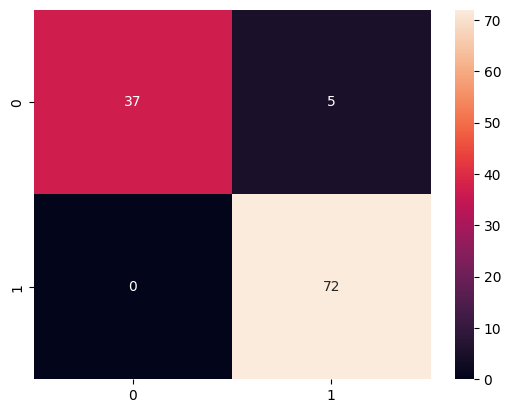

In [72]:
sns.heatmap(confusion_matrix,annot=True)
plt.show()

11.Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [73]:
from sklearn.ensemble import StackingClassifier

estimators=[
    ('dt',DecisionTreeClassifier()),
    ('svm',SVC()),
    ('lr',LogisticRegression())
]
stacking_classifier=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
stacking_classifier.fit(X_train,y_train)
y_pred=stacking_classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)

In [74]:
acc

0.96

In [75]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


Decision Tree Accuracy: 0.92
SVM Accuracy: 0.94
Logistic Regression Accuracy: 0.94


12.Train a Random Forest Classifier and print the top 5 most important features

In [80]:
importances = random_forest.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort by importance and get top 5
top_5_features = feature_importances.sort_values('importance', ascending=False).head(5)

# Print the top 5 features
top_5_features


,feature,importance
22,worst perimeter,0.130773
27,worst concave points,0.130307
23,worst area,0.117678
7,mean concave points,0.091731
20,worst radius,0.084314


13.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [82]:
# prompt: Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier

# Assuming X_train, y_train, X_test, y_test are defined from previous code

bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.9473684210526315
Recall: 1.0
F1-score: 0.972972972972973


14.Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [83]:
from sklearn.metrics import roc_auc_score



y_pred_proba = random_forest.predict_proba(X2_test)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y2_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 0.9773478835978836


15.Train a Random Forest Classifier and plot the Precision-Recall curve

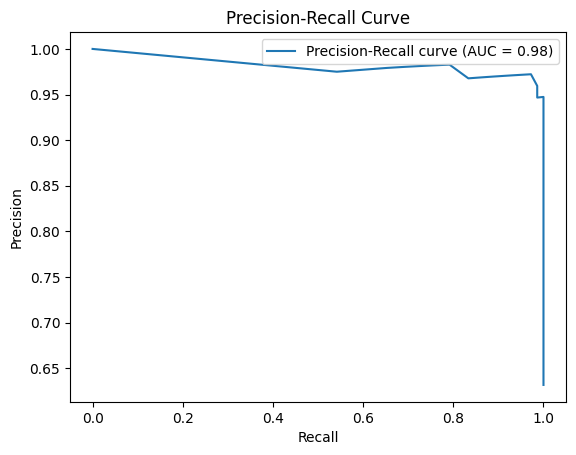

In [84]:
# prompt: Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt


y_pred_proba = random_forest.predict_proba(X2_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y2_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


16.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [85]:
# prompt: Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are defined from previous code

estimators = [
    ('rf', RandomForestClassifier(random_state=1)),
    ('lr', LogisticRegression(random_state=1))
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1))
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

lr_classifier = LogisticRegression(random_state=1)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649122807017544
Random Forest Accuracy: 0.956140350877193
Logistic Regression Accuracy: 0.9473684210526315


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
